In [53]:
# Install pandas_ta on our machine via your notebook
!pip install pandas_ta matplotlib

In [54]:
# Import the libraries needed to create a dataframe and make calculations
import pandas as pd
import pandas_ta as pta
from pandas import DataFrame
import numpy as np

In [55]:
# Load freqtrade data
df = pd.read_json("./data/BTC_USDT-1d.json") # create dataframe and read the json data in the datasets directory
df.columns=['date','open','high','low','close','volume'] # name the columns that are loaded into the dataframe
df['date']=(pd.to_datetime(df['date'],unit='ms')) # the date column consists of unix time in milliseconds, so this command changes this data into human readable form.
df.tail(5) # and finally, this command outputs the dataframe

,date,open,high,low,close,volume
1833,2022-08-24,21529.11,21900.00,21145.00,21368.08,174383.22046
1834,2022-08-25,21368.05,21819.88,21310.15,21559.04,169915.78301
1835,2022-08-26,21559.04,21886.77,20107.90,20241.05,273811.61955
1836,2022-08-27,20239.14,20402.93,19800.00,20037.60,162582.46032
1837,2022-08-28,20037.60,20171.18,19520.00,19555.61,139307.95976


In [56]:
df

,date,open,high,low,close,volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
1833,2022-08-24,21529.11,21900.00,21145.00,21368.08,174383.220460
1834,2022-08-25,21368.05,21819.88,21310.15,21559.04,169915.783010
1835,2022-08-26,21559.04,21886.77,20107.90,20241.05,273811.619550
1836,2022-08-27,20239.14,20402.93,19800.00,20037.60,162582.460320


In [57]:
df.shape

(1838, 6)

In [58]:
# Show all the indicator functions from the Pandas ta library
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [59]:
# Show information on the ichimoku indicator
help(pta.ichimoku)

Help on function ichimoku in module pandas_ta.overlap.ichimoku:

ichimoku(high, low, close, tenkan=None, kijun=None, senkou=None, include_chikou=True, offset=None, **kwargs)
    Ichimoku Kinkō Hyō (ichimoku)
    
    Developed Pre WWII as a forecasting model for financial markets.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/ichimoku-ich/
    
    Calculation:
        Default Inputs:
            tenkan=9, kijun=26, senkou=52
        MIDPRICE = Midprice
        TENKAN_SEN = MIDPRICE(high, low, close, length=tenkan)
        KIJUN_SEN = MIDPRICE(high, low, close, length=kijun)
        CHIKOU_SPAN = close.shift(-kijun)
    
        SPAN_A = 0.5 * (TENKAN_SEN + KIJUN_SEN)
        SPAN_A = SPAN_A.shift(kijun)
    
        SPAN_B = MIDPRICE(high, low, close, length=senkou)
        SPAN_B = SPAN_B.shift(kijun)
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Serie

In [60]:
#Show the complete output of the Ichimoku indicator
pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=None, kijun=None, senkou=None, offset=None)

(         ISA_9     ISB_26      ITS_9    IKS_26   ICS_26
 0          NaN        NaN        NaN       NaN  4163.72
 1          NaN        NaN        NaN       NaN  3944.69
 2          NaN        NaN        NaN       NaN  3189.02
 3          NaN        NaN        NaN       NaN  3700.00
 4          NaN        NaN        NaN       NaN  3714.95
 ...        ...        ...        ...       ...      ...
 1833  22125.69  24474.610  22604.305  22986.61      NaN
 1834  22238.36  24161.000  22604.305  22986.61      NaN
 1835  22238.36  24002.400  21853.950  22659.61      NaN
 1836  22238.36  23531.205  21504.335  22505.66      NaN
 1837  22238.36  23083.480  20710.000  22365.66      NaN
 
 [1838 rows x 5 columns],
            ISA_9     ISB_26
 1838  22238.3600  22258.920
 1839  22322.3675  21145.000
 1840  22661.7350  21145.000
 1841  22661.7350  21145.000
 1842  22661.7350  21145.000
 1843  22732.2675  21145.000
 1844  22923.8225  21314.205
 1845  22947.9025  21647.000
 1846  23235.8950  21772.27

In [61]:
# Default Ichimoku settings
pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=9, kijun=26, senkou=52, include_chikou=True, offset=0)

(         ISA_9     ISB_26      ITS_9    IKS_26   ICS_26
 0          NaN        NaN        NaN       NaN  4163.72
 1          NaN        NaN        NaN       NaN  3944.69
 2          NaN        NaN        NaN       NaN  3189.02
 3          NaN        NaN        NaN       NaN  3700.00
 4          NaN        NaN        NaN       NaN  3714.95
 ...        ...        ...        ...       ...      ...
 1833  22125.69  24474.610  22604.305  22986.61      NaN
 1834  22238.36  24161.000  22604.305  22986.61      NaN
 1835  22238.36  24002.400  21853.950  22659.61      NaN
 1836  22238.36  23531.205  21504.335  22505.66      NaN
 1837  22238.36  23083.480  20710.000  22365.66      NaN
 
 [1838 rows x 5 columns],
            ISA_9     ISB_26
 1838  22238.3600  22258.920
 1839  22322.3675  21145.000
 1840  22661.7350  21145.000
 1841  22661.7350  21145.000
 1842  22661.7350  21145.000
 1843  22732.2675  21145.000
 1844  22923.8225  21314.205
 1845  22947.9025  21647.000
 1846  23235.8950  21772.27

In [62]:
# Crypto Ichimoku settings
pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=20, kijun=60, senkou=120, include_chikou=True, offset=30)

(          ISA_20    ISB_60    ITS_20   IKS_60  ICS_60
 0            NaN       NaN       NaN      NaN     NaN
 1            NaN       NaN       NaN      NaN     NaN
 2            NaN       NaN       NaN      NaN     NaN
 3            NaN       NaN       NaN      NaN     NaN
 4            NaN       NaN       NaN      NaN     NaN
 ...          ...       ...       ...      ...     ...
 1833  34434.0350  37444.92  21593.84  25010.5     NaN
 1834  34252.6725  37444.92  21593.84  25010.5     NaN
 1835  33835.8425  37444.92  21593.84  25010.5     NaN
 1836  33414.7475  37444.92  21593.84  25010.5     NaN
 1837  33266.5275  37444.92  21676.80  25010.5     NaN
 
 [1838 rows x 5 columns],
           ISA_20     ISB_60
 1838  26177.0450  32905.920
 1839  25953.1825  32905.920
 1840  25540.9025  32905.920
 1841  24613.0975  32905.920
 1842  23728.8400  32905.920
 1843  23596.5075  32905.920
 1844  23161.5550  32905.920
 1845  22843.7875  32905.920
 1846  22692.1925  32905.920
 1847  22793.5925  329

In [63]:
# Add output to a variable
ichimoku = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=20, kijun=60, senkou=120, include_chikou=True, offset=30)


In [64]:
# Print this variable
print(ichimoku)

(          ISA_20    ISB_60    ITS_20   IKS_60  ICS_60
0            NaN       NaN       NaN      NaN     NaN
1            NaN       NaN       NaN      NaN     NaN
2            NaN       NaN       NaN      NaN     NaN
3            NaN       NaN       NaN      NaN     NaN
4            NaN       NaN       NaN      NaN     NaN
...          ...       ...       ...      ...     ...
1833  34434.0350  37444.92  21593.84  25010.5     NaN
1834  34252.6725  37444.92  21593.84  25010.5     NaN
1835  33835.8425  37444.92  21593.84  25010.5     NaN
1836  33414.7475  37444.92  21593.84  25010.5     NaN
1837  33266.5275  37444.92  21676.80  25010.5     NaN

[1838 rows x 5 columns],           ISA_20     ISB_60
1838  26177.0450  32905.920
1839  25953.1825  32905.920
1840  25540.9025  32905.920
1841  24613.0975  32905.920
1842  23728.8400  32905.920
1843  23596.5075  32905.920
1844  23161.5550  32905.920
1845  22843.7875  32905.920
1846  22692.1925  32905.920
1847  22793.5925  32905.920
1848  22793.5925 

In [65]:
type(ichimoku)

tuple

In [66]:
# Print the first tuple item, which is dataframe 0
# For the visible period: spanA, spanB, tenkan_sen, kijun_sen,and chikou_span columns
print(ichimoku[0])

          ISA_20    ISB_60    ITS_20   IKS_60  ICS_60
0            NaN       NaN       NaN      NaN     NaN
1            NaN       NaN       NaN      NaN     NaN
2            NaN       NaN       NaN      NaN     NaN
3            NaN       NaN       NaN      NaN     NaN
4            NaN       NaN       NaN      NaN     NaN
...          ...       ...       ...      ...     ...
1833  34434.0350  37444.92  21593.84  25010.5     NaN
1834  34252.6725  37444.92  21593.84  25010.5     NaN
1835  33835.8425  37444.92  21593.84  25010.5     NaN
1836  33414.7475  37444.92  21593.84  25010.5     NaN
1837  33266.5275  37444.92  21676.80  25010.5     NaN

[1838 rows x 5 columns]


In [67]:
# Print dataframe 1:For the forward looking period: spanA and spanB columns
print(ichimoku[1])

          ISA_20     ISB_60
1838  26177.0450  32905.920
1839  25953.1825  32905.920
1840  25540.9025  32905.920
1841  24613.0975  32905.920
1842  23728.8400  32905.920
1843  23596.5075  32905.920
1844  23161.5550  32905.920
1845  22843.7875  32905.920
1846  22692.1925  32905.920
1847  22793.5925  32905.920
1848  22793.5925  32905.920
1849  22793.5925  32905.920
1850  22793.5925  32905.920
1851  22793.5925  32905.920
1852  22793.5925  32905.920
1853  22793.5925  32905.920
1854  22793.5925  32905.920
1855  22793.5925  32905.920
1856  22856.1575  32905.920
1857  23111.7500  32905.920
1858  23269.6850  32905.920
1859  23269.6850  32905.920
1860  23269.6850  32905.920
1861  23302.1700  32905.920
1862  23302.1700  32905.920
1863  23302.1700  32905.920
1864  23302.1700  32859.235
1865  23302.1700  32661.110
1866  23302.1700  32611.000
1867  23343.6500  32533.055
1868  23295.9775  32533.055
1869  23241.6450  32533.055
1870  23241.6450  32411.000
1871  23417.9275  32411.000
1872  23609.4825  31

In [68]:
# Create a dataframe from the first Tuple entry
pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=20, kijun=60, senkou=120, include_chikou=True, offset=30)[0]

,ISA_20,ISB_60,ITS_20,IKS_60,ICS_60
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1833,34434.0350,37444.92,21593.84,25010.5,NaN
1834,34252.6725,37444.92,21593.84,25010.5,NaN
1835,33835.8425,37444.92,21593.84,25010.5,NaN
1836,33414.7475,37444.92,21593.84,25010.5,NaN


In [69]:
# Get Tenkan Sen from the dataframe that is the first Tuple entry
pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=20, kijun=60, senkou=120, include_chikou=True, offset=30)[0]['ITS_20']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1833    21593.84
1834    21593.84
1835    21593.84
1836    21593.84
1837    21676.80
Name: ITS_20, Length: 1838, dtype: float64

In [70]:
# Create a new column in the df dataframe, call it TenkanSen and add the output of the Ichimoku cloud indicator
df['TenkanSen'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=20, kijun=60, senkou=120, include_chikou=True, offset=30)[0]['ITS_20']
df

,date,open,high,low,close,volume,TenkanSen
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN
...,...,...,...,...,...,...,...
1833,2022-08-24,21529.11,21900.00,21145.00,21368.08,174383.220460,21593.84
1834,2022-08-25,21368.05,21819.88,21310.15,21559.04,169915.783010,21593.84
1835,2022-08-26,21559.04,21886.77,20107.90,20241.05,273811.619550,21593.84
1836,2022-08-27,20239.14,20402.93,19800.00,20037.60,162582.460320,21593.84


In [71]:
# Lets recreate the original dataframe
df = pd.read_json("./data/BTC_USDT-1d.json")
df.columns=['date','open','high','low','close','volume']
df['date']=(pd.to_datetime(df['date'],unit='ms'))

# And then create a whole new dataframe with the dataframes df, ichimoku tuple entry 0 and ichimoku tuple entry 1
ichimoku = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=20, kijun=60, senkou=120, include_chikou=True, offset=30)
df = pd.concat([df, ichimoku[0], ichimoku[1]], axis=1)
df

,date,open,high,low,close,volume,ISA_20,ISB_60,ITS_20,IKS_60,ICS_60,ISA_20,ISB_60
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22452.635,28997.315
1894,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22452.635,28997.315
1895,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22289.135,28822.885
1896,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22212.160,28822.885


In [72]:
# Let's first create a new dataframe from the original dataset
df2 = pd.read_json("./data/BTC_USDT-1d.json")
df2.columns=['date','open','high','low','close','volume']
df2['date']=(pd.to_datetime(df['date'],unit='ms'))
df2.tail(5)

# Then add a column for each Ichimoku indicator output to that dataset.
# Each column represents the output of the First Ichimoku Variable tuple and its specific column.
df2['Tenkan'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ITS_9']
df2['Kijun'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['IKS_26']
df2['SenkanA'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISA_9']
df2['SenkanB'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISB_26']
df2['Chiko'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ICS_26']
df2

,date,open,high,low,close,volume,Tenkan,Kijun,SenkanA,SenkanB,Chiko
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN,4163.72
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN,3944.69
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN,3189.02
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN,3700.00
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN,3714.95
...,...,...,...,...,...,...,...,...,...,...,...
1833,2022-08-24,21529.11,21900.00,21145.00,21368.08,174383.220460,22604.305,22986.61,22125.69,24474.610,NaN
1834,2022-08-25,21368.05,21819.88,21310.15,21559.04,169915.783010,22604.305,22986.61,22238.36,24161.000,NaN
1835,2022-08-26,21559.04,21886.77,20107.90,20241.05,273811.619550,21853.950,22659.61,22238.36,24002.400,NaN
1836,2022-08-27,20239.14,20402.93,19800.00,20037.60,162582.460320,21504.335,22505.66,22238.36,23531.205,NaN


In [73]:
# Let's first create dataframe 3 from the original candle data
df3 = pd.read_json("./data/BTC_USDT-1d.json")
df3.columns=['date','open','high','low','close','volume']
df3['date']=(pd.to_datetime(df['date'],unit='ms'))
df3.tail(5)

# Specify the lenghts for each indicator

TS = 9
KS = 26
SS = 52
CS = 26
OS = 0

# Then add a column for each Ichimoku indicator output to that dataset.
# Each column represents the output of the First Ichimoku Variable tuple and its specific column.
df3['Tenkan'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ITS_{TS}']
df3['Kijun'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'IKS_{KS}']
df3['SenkanA'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ISA_{TS}']
df3['SenkanB'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ISB_{KS}']
df3['Chiko'] = pta.ichimoku(high=df['high'], low=df['low'], close=df['close'], tenkan=TS, kijun=KS, senkou=SS, offset=OS)[0][f'ICS_{KS}']

df3

,date,open,high,low,close,volume,Tenkan,Kijun,SenkanA,SenkanB,Chiko
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN,4163.72
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN,3944.69
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN,3189.02
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN,3700.00
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN,3714.95
...,...,...,...,...,...,...,...,...,...,...,...
1833,2022-08-24,21529.11,21900.00,21145.00,21368.08,174383.220460,22604.305,22986.61,22125.69,24474.610,NaN
1834,2022-08-25,21368.05,21819.88,21310.15,21559.04,169915.783010,22604.305,22986.61,22238.36,24161.000,NaN
1835,2022-08-26,21559.04,21886.77,20107.90,20241.05,273811.619550,21853.950,22659.61,22238.36,24002.400,NaN
1836,2022-08-27,20239.14,20402.93,19800.00,20037.60,162582.460320,21504.335,22505.66,22238.36,23531.205,NaN


# plotting

In [74]:
# Install matplotlib on the machine thought the Jupyter commandline
!pip install matplotlib

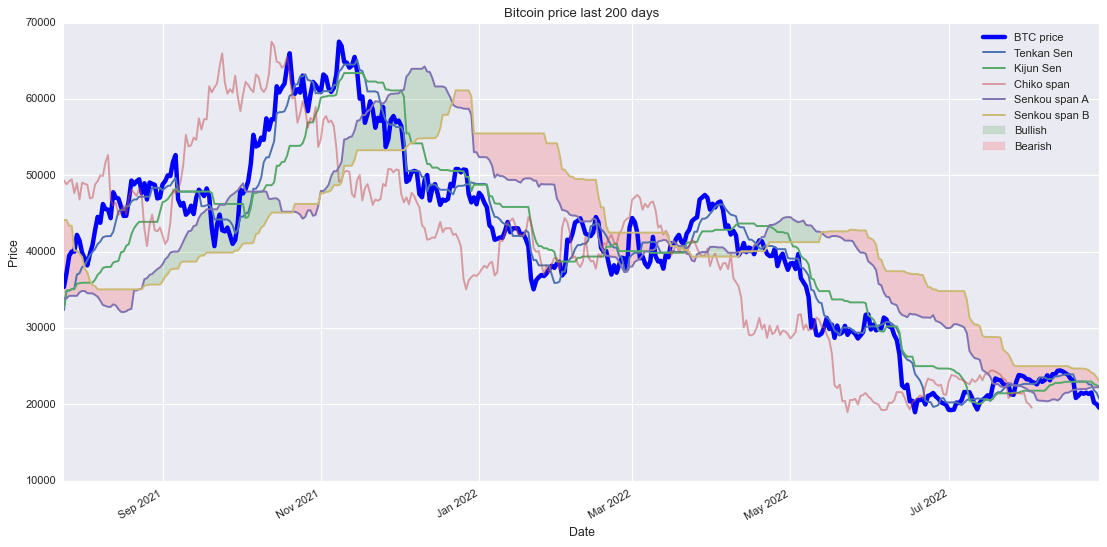

In [84]:
# Import necessary modules
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
plt.figure(figsize=(14,7))

# Load data in another dataframe
df3 = pd.read_json("./data/BTC_USDT-1d.json")
df3.columns=['date','open','high','low','close','volume']
df3['date']=(pd.to_datetime(df['date'],unit='ms'))

# Add default Ichimoku
df3['SenkanA'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISA_9']
df3['SenkanB'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ISB_26']
df3['Tenkan'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ITS_9']
df3['Kijun'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['IKS_26']
df3['Chiko'] = pta.ichimoku(high=df3['high'], low=df3['low'], close=df3['close'], tenkan=None, kijun=None, senkou=None, offset=None)[0]['ICS_26']

# df.sort_values(df['Date'], inplace=True)

# Determine days to show in chart
days = 400
dates = df3['date'].tail(days)
price = df3['close'].tail(days)
Tenkan = df3['Tenkan'].tail(days)
Kijun = df3['Kijun'].tail(days)
Chiko = df3['Chiko'].tail(days)
SenkouA = df3['SenkanA'].tail(days)
SenkouB = df3['SenkanB'].tail(days)

# Adding lines
plt.plot_date(dates, price, linestyle='solid', linewidth=4, fmt='b', marker=None, label='BTC price')
plt.plot(dates, Tenkan, label='Tenkan Sen')
plt.plot(dates, Kijun, label='Kijun Sen')
plt.plot(dates, Chiko, label='Chiko span', alpha=0.5)
plt.plot(dates, SenkouA, label='Senkou span A')
plt.plot(dates, SenkouB, label='Senkou span B')

# Fill Kumo Cloud
plt.fill_between(dates, SenkouA, SenkouB, 
                 where=(SenkouA >= SenkouB), color='green', alpha=0.15,
                label='Bullish')
plt.fill_between(dates, SenkouA, SenkouB, 
                 where=(SenkouA <= SenkouB), color='red', alpha=0.15,
                label='Bearish')


plt.gcf().autofmt_xdate()

plt.title('Bitcoin price last 200 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()